In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
dataframe = pd.read_csv("Zomato data .csv")


In [6]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [6]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [7]:
# Convert 'rate' column: Remove '/5' and convert to float
dataframe['rate'] = dataframe['rate'].str.replace('/5', '', regex=False).astype(float)

In [8]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [9]:
# Rename the column
dataframe = dataframe.rename(columns={'listed_in(type)': 'Restaurant_Type'})

# Display the first few rows to verify
dataframe.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),Restaurant_Type
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   Restaurant_Type              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


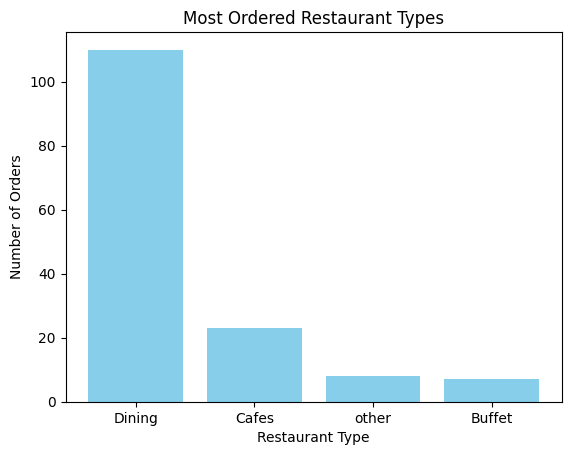

In [10]:
# Count restaurant orders
restaurant_counts = dataframe['Restaurant_Type'].value_counts()

# Plot bar chart
plt.bar(restaurant_counts.index, restaurant_counts.values, color="skyblue")
plt.xlabel("Restaurant Type")
plt.ylabel("Number of Orders")
plt.title("Most Ordered Restaurant Types")
plt.show()

In [11]:
VOTE_BY_RESTAURANT_TYPE = dataframe.groupby('Restaurant_Type')['votes'].sum().reset_index()

In [15]:
VOTE_BY_RESTAURANT_TYPE

,Restaurant_Type,votes
0,Buffet,3028
1,Cafes,6434
2,Dining,20363
3,other,9367


In [ ]:
# show the visualization VOTE_BY_RESTAURANT_TYPE .

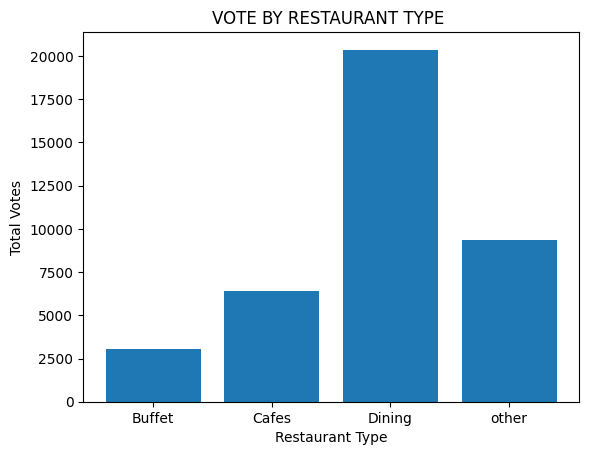

In [12]:
plt.bar(VOTE_BY_RESTAURANT_TYPE['Restaurant_Type'],VOTE_BY_RESTAURANT_TYPE['votes'])
plt.xlabel('Restaurant Type')
plt.ylabel('Total Votes')
plt.title('VOTE BY RESTAURANT TYPE ')
plt.show()

In [16]:
RESTAURANT_RATINGS = dataframe.groupby('name')['rate'].mean().reset_index()

In [17]:
RESTAURANT_RATINGS 

,name,rate
0,360 Atoms Restaurant And Cafe,3.1
1,Aarush's Food Plaza,3.4
2,Addhuri Udupi Bhojana,3.7
3,Amma - Manae,3.1
4,Anna Kuteera,4.0
...,...,...
140,Village Café,4.1
141,Wamama,4.2
142,Wood Stove,3.4
143,Woodee Pizza,3.7


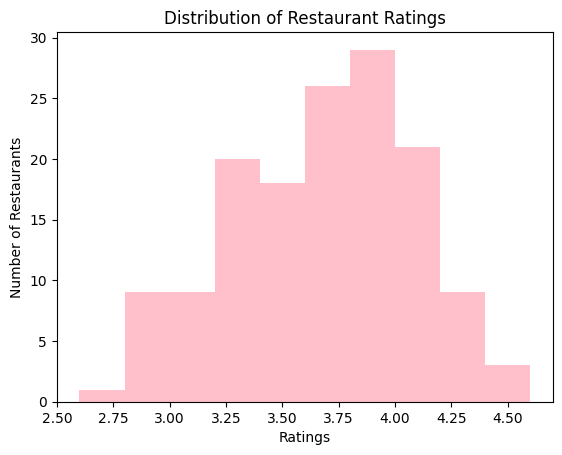

In [18]:
plt.hist(RESTAURANT_RATINGS['rate'],bins = 10 , color = 'pink')
plt.xlabel("Ratings")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurant Ratings")
plt.show()

In [36]:
COUPLE_ORDER = dataframe.groupby('online_order')['approx_cost(for two people)'].mean().reset_index()

In [37]:
COUPLE_ORDER

,online_order,approx_cost(for two people)
0,No,358.888889
1,Yes,510.344828


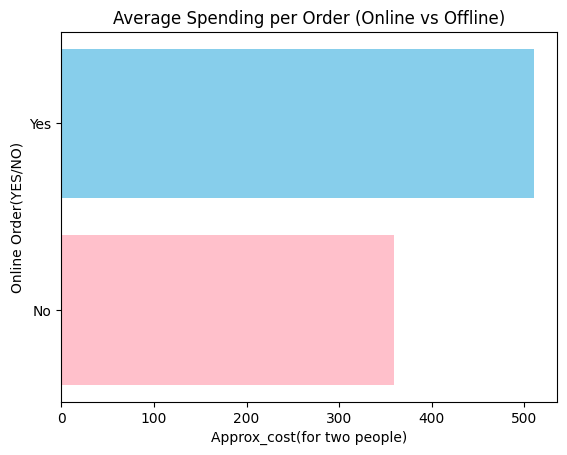

In [39]:
plt.barh(COUPLE_ORDER['online_order'],COUPLE_ORDER['approx_cost(for two people)'],color = ['pink','skyblue'])
plt.ylabel('Online Order(YES/NO)')
plt.xlabel('Approx_cost(for two people)')
plt.title('Average Spending per Order (Online vs Offline)')
plt.show()


In [28]:
Highest_Ratings = dataframe.groupby('online_order')['rate'].mean().reset_index()

In [29]:
Highest_Ratings

,online_order,rate
0,No,3.487778
1,Yes,3.858621


In [ ]:
#FOR VISUALIZATION MODE (ONLINE/OFFILINE) RECEIVED THE HIGHEST RATINGS.

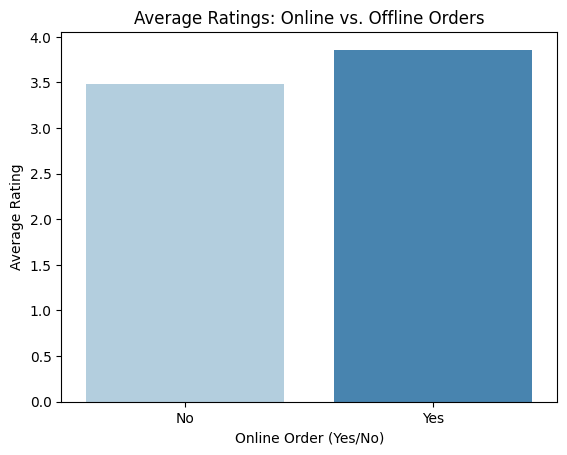

In [32]:
sns.barplot(data=Highest_Ratings, x='online_order', y='rate', palette='Blues',hue='online_order')

plt.title("Average Ratings: Online vs. Offline Orders")
plt.xlabel("Online Order (Yes/No)")
plt.ylabel("Average Rating")
plt.show()


In [28]:
Offline_Orders = dataframe[dataframe['online_order'] == 'No']['Restaurant_Type'].value_counts().reset_index()

In [29]:
Offline_Orders

,Restaurant_Type,count
0,Dining,77
1,Cafes,8
2,Buffet,3
3,other,2


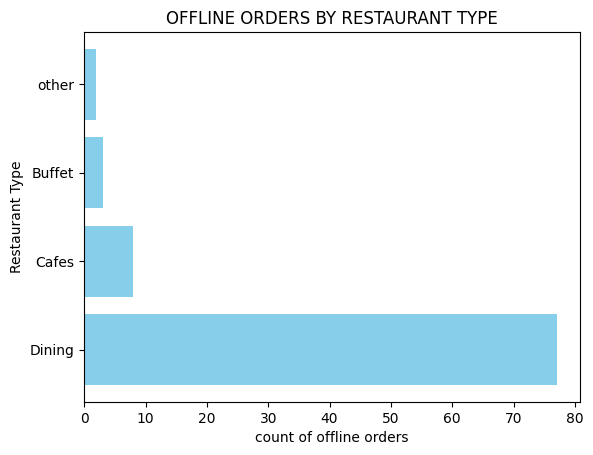

In [34]:
plt.barh(Offline_Orders['Restaurant_Type'],Offline_Orders['count'],color = "skyblue")
plt.xlabel("count of offline orders")
plt.ylabel("Restaurant Type")
plt.title("OFFLINE ORDERS BY RESTAURANT TYPE")
plt.show()